In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, expon

Number of samples279715
BENIGN    234228
ATTACK     45487
Name: Label, dtype: int64
Axes(0.22375,0.11;0.5775x0.77)


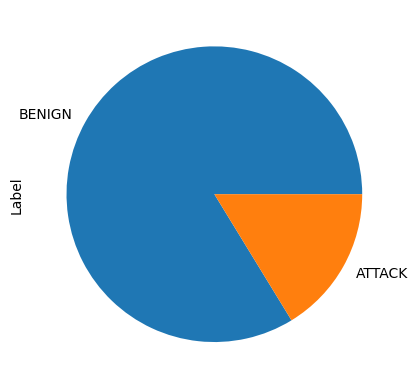

In [4]:
train_dataset_path = 'C:/Users/katsa/OneDrive/Jupyter_files/cic_nb15_hybrid/merged_train_dataset.csv'
merged_dataset_train = pd.read_csv(train_dataset_path)
print('Number of samples' + str(len(merged_dataset_train)))
print(merged_dataset_train['Label'].value_counts())
print(merged_dataset_train['Label'].value_counts().plot.pie())

Number of samples6993
BENIGN    5852
ATTACK    1141
Name: Label, dtype: int64
Axes(0.22375,0.11;0.5775x0.77)


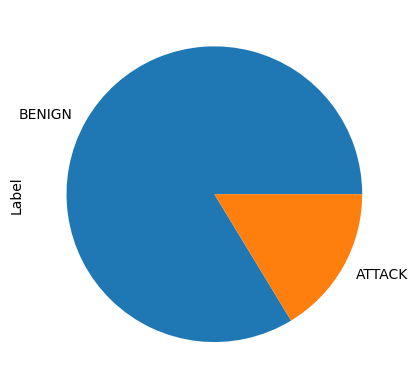

In [5]:
merged_dataset_train = merged_dataset_train.sample(frac=1/40)
print('Number of samples' + str(len(merged_dataset_train)))
print(merged_dataset_train['Label'].value_counts())
print(merged_dataset_train['Label'].value_counts().plot.pie())
X_train, y_train = merged_dataset_train.iloc[:, :-1], merged_dataset_train['Label']

In [6]:
# Create a pipeline with SimpleImputer, StandardScaler, and DecisionTreeClassifier
pipeline = Pipeline([
    ('imputer', SimpleImputer()),
    ('scaler', StandardScaler()),
    ('clf', SVC())
])

# Define the hyperparameter grid to search over
param_grid = {
    'clf__gamma': [0.001, 0.01, 0.1, 1],
    'clf__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'clf__C': [0.1, 1, 10, 100]
    #'clf__class_weight': [None, 'balanced']
}

# # Create a GridSearchCV object with the pipeline and hyperparameter grid
# grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5)
# # Fit the GridSearchCV object on your training data
# grid_search.fit(X_train, y_train)

# Print the best hyperparameters and corresponding score
# print("Best parameters: {}".format(grid_search.best_params_))
# print("Best score: {:.2f}".format(grid_search.best_score_))

# Perform randomized search
random_search = RandomizedSearchCV(pipeline, param_grid, n_iter=10, cv=5)
random_search.fit(X_train, y_train)

best_params = random_search.best_params_
best_model = random_search.best_estimator_
best_score = random_search.best_score_

print("Best parameters: {}".format(best_params))
print("Best estimator: {}".format(best_model))
print("Best score: {:.2f}".format(best_score))

Best parameters: {'clf__kernel': 'poly', 'clf__gamma': 1, 'clf__C': 10}
Best estimator: Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('clf', SVC(C=10, gamma=1, kernel='poly'))])
Best score: 0.93


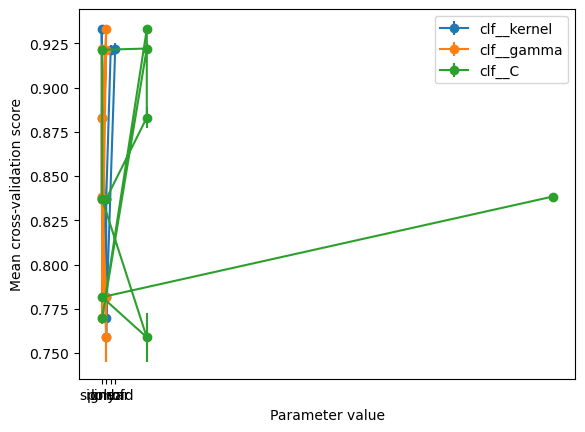

In [7]:
# assume you have already created and fitted the grid search object 'grid_search'

# convert cv_results_ to a pandas DataFrame
# results_df = pd.DataFrame(grid_search.cv_results_)
results_df = pd.DataFrame(random_search.cv_results_)

# extract the relevant columns
param_cols = [col for col in results_df.columns if col.startswith('param_')]
mean_test_score = 'mean_test_score'
std_test_score = 'std_test_score'

# plot the mean test score and standard deviation for each parameter setting
fig, ax = plt.subplots()
for col in param_cols:
    df = results_df[[col, mean_test_score, std_test_score]].dropna()
    param_name = col.replace('param_', '')
    param_values = df[col]
    ax.errorbar(param_values, df[mean_test_score], yerr=df[std_test_score], label=param_name, fmt='-o')
ax.set_xlabel('Parameter value')
ax.set_ylabel('Mean cross-validation score')
ax.legend()
plt.show()

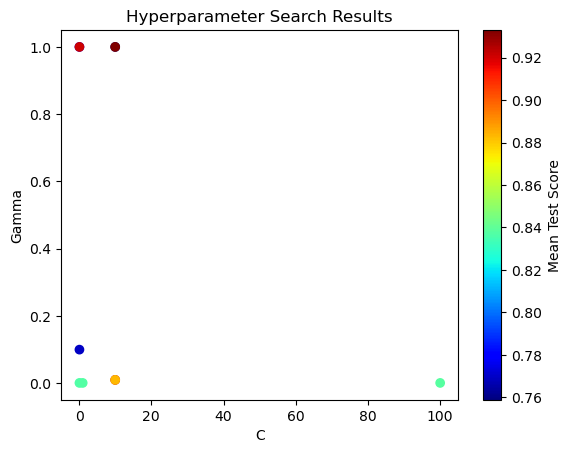

In [8]:
# Assuming you have a randomized search or bayesian search object
search_results = random_search.cv_results_  # Replace with your search object

# Extract the hyperparameters and performance metric scores
params = search_results['params']
mean_scores = search_results['mean_test_score']
std_scores = search_results['std_test_score']

# Extract the hyperparameter values for each configuration
c_values = [params[i]['clf__C'] for i in range(len(params))]
kernel_values = [params[i]['clf__kernel'] for i in range(len(params))]
gamma_values = [params[i]['clf__gamma'] for i in range(len(params))]
#class_weight_values = [params[i]['clf__class_weight'] for i in range(len(params))]

# Plotting the results
fig, ax = plt.subplots()

# Create a scatter plot with color-coded performance scores
scatter = ax.scatter(c_values, gamma_values, c=mean_scores, cmap='jet')
cbar = plt.colorbar(scatter)
cbar.set_label('Mean Test Score')

# Set the axis labels and title
ax.set_xlabel('C')
ax.set_ylabel('Gamma')
ax.set_title('Hyperparameter Search Results')

plt.show()